<a href="https://colab.research.google.com/github/maeve70/ChocolateWebScraper/blob/main/ChocolateWebScraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Yay, chocolate! 
This was an off-platform sort of project on the DS path.

In [1]:
import seaborn as sns; sns.set
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#<tr> and <td> elements most likely.
webpage_response = requests.get("https://s3.amazonaws.com/codecademy-content/courses/beautifulsoup/cacao/index.html")

webpage = webpage_response.content
#make an object called soup out of the webpage
soup = BeautifulSoup(webpage, "html.parser")


print(soup.prettify)


<bound method Tag.prettify of <!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<style>
         #cacaoTable {
         border-collapse: collapse;
         border: 2px black solid;
         font: 12px sans-serif;
         }
         #cacaoTable td {
         border: 1px black solid;
         padding: 5px;
         }
         #infoContainer {
         margin-bottom: 10px;
         display: inline-block;
         margin-right: 10px;
         }
         #chocolate {
         width: 300px;
         }
         #picContainer {
         display: inline;
         }
      </style>
</head>
<body>
<!-- <script src="http://d3js.org/d3.v3.min.js"></script> -->
<div id="banner">
<h1>Cacao Ratings</h1>
</div>
<div id="infoContainer">
<table class="infoTable">
<tr>
<td>Compiled ratings of over 1700 Chocolate bars</td>
</tr>
<tr>
<td>Ratings are from 1-5</td>
</tr>
</table>
</div>
<div id="picContainer">
<img id="chocolate" src="chocolate.jpg"/>
</div>
<table id="cacaoTable">
<tr>
<td cl

The first thing to do is to put all of the ratings into a list.

Use a command on the soup object to get all of the tags that contain the ratings.
Create a loop that will grab all the ratings. 
Loop through the ratings tags and get the text contained in each one. Add it to the ratings list.

Convert the rating to a float, so that the ratings list will be numerical. This should help with calculations later.

In [3]:
#<td class="Rating">Rating</td>
#5 is the highest rating

ratings_data = soup.find_all(attrs={'class': 'Rating'})
ratings = []

for rating in ratings_data[1:]:
  ratings.append(float(rating.string))


print(ratings) 



[3.75, 2.75, 3.0, 3.5, 3.5, 2.75, 3.5, 3.5, 3.75, 4.0, 2.75, 3.0, 3.25, 3.75, 2.75, 3.0, 3.25, 4.0, 3.25, 3.5, 4.0, 3.5, 3.75, 3.75, 3.75, 2.75, 3.25, 3.5, 3.5, 2.75, 3.0, 3.0, 3.75, 2.75, 2.75, 2.75, 2.75, 3.0, 2.5, 2.5, 3.5, 3.5, 3.5, 3.5, 2.75, 3.0, 2.5, 2.5, 2.75, 2.5, 3.0, 3.25, 3.0, 3.25, 4.0, 3.75, 4.0, 3.0, 3.0, 2.75, 3.5, 3.0, 3.75, 3.0, 2.75, 2.75, 3.0, 3.25, 3.5, 3.0, 3.25, 3.25, 3.25, 3.25, 3.5, 3.75, 4.0, 4.0, 5.0, 3.0, 3.0, 3.5, 3.75, 4.0, 3.5, 3.5, 5.0, 4.0, 3.25, 2.75, 3.75, 3.75, 4.0, 3.0, 3.5, 3.0, 2.5, 2.75, 3.0, 3.5, 3.75, 3.5, 3.25, 3.25, 3.5, 3.75, 3.5, 4.0, 4.0, 3.75, 3.25, 3.25, 3.5, 3.5, 3.75, 3.5, 3.75, 4.0, 2.75, 3.25, 3.5, 3.25, 3.75, 4.0, 2.75, 1.75, 3.75, 3.25, 3.25, 3.5, 2.5, 2.75, 1.75, 3.0, 3.0, 3.25, 3.75, 2.75, 3.75, 3.75, 3.75, 3.75, 2.5, 3.0, 3.25, 3.5, 3.0, 2.5, 2.5, 2.75, 3.5, 3.5, 4.0, 3.25, 3.5, 3.75, 2.75, 3.5, 3.75, 3.25, 3.0, 3.25, 2.75, 2.75, 2.75, 2.75, 2.75, 2.75, 2.75, 3.5, 3.5, 3.25, 3.5, 2.75, 3.0, 3.5, 3.5, 3.5, 3.5, 4.0, 4.0, 3.75, 2.

Create a histogram!

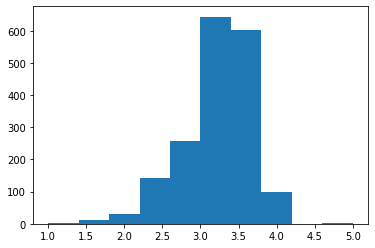

In [4]:
plt.hist(ratings)

plt.show()


So, most of the chocolate ratings are between 3-3.5

We want to now find the 10 most highly rated chocolatiers. One way to do this is to make a DataFrame that has the chocolate companies in one column, and the ratings in another. Then, we can do a groupby to find the ones with the highest average rating.

First, let’s find all the tags on the webpage that contain the company names.

In [5]:
#<td class="Company">Company&nbsp;
             
company_data = soup.select('.Company')
companies = []


for company in company_data[1:]:
  companies.append(company.get_text())
print(companies)


['A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'Acalli', 'Acalli', 'Adi', 'Adi', 'Adi', 'Adi', 'Aequare (Gianduja)', 'Aequare (Gianduja)', 'Ah Cacao', "Akesson's (Pralus)", "Akesson's (Pralus)", "Akesson's (Pralus)", 'Alain Ducasse', 'Alain Ducasse', 'Alain Ducasse', 'Alain Ducasse', 'Alain Ducasse', 'Alexandre', 'Alexandre', 'Alexandre', 'Alexandre', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Amano', 'Amano', 'Amano', 'Amano', 'Amano', 'Amano', 'Amano', 'Amano', 'Amano', 'Amatller (Simon Coll)', 'Amatller (Simon Coll)', 'Amatller (Simon Coll)', 'Amatller 

Create a df using both lists as columns.

In [20]:
#create a dictionary first then a df using pd.DataFrame.from_dict(d)
d = {"Company" : companies, "Ratings": ratings}    

chocolate_df = pd.DataFrame.from_dict(d)

print(chocolate_df.head())



    Company  Ratings
0  A. Morin     3.75
1  A. Morin     2.75
2  A. Morin     3.00
3  A. Morin     3.50
4  A. Morin     3.50


Now group by company and average rating and then get the top 10.

In [7]:
mean_ratings = chocolate_df.groupby("Company").Ratings.mean()

top_ten = mean_ratings.nlargest(10)

print(top_ten)


Company
Tobago Estate (Pralus)                  4.000000
Heirloom Cacao Preservation (Zokoko)    3.875000
Ocelot                                  3.875000
Amedei                                  3.846154
Matale                                  3.812500
Patric                                  3.791667
Idilio (Felchlin)                       3.775000
Acalli                                  3.750000
Chocola'te                              3.750000
Christopher Morel (Felchlin)            3.750000
Name: Ratings, dtype: float64


Now get the cocoa percents .Cocoa_Percent

In [8]:
cocoa_percents= []
cocoa_percent_tags = soup.select(".CocoaPercent")

for td in cocoa_percent_tags[1:]:
  percent = int(float(td.get_text().strip('%')))
  cocoa_percents.append(percent)

print(cocoa_percents)


[63, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 63, 70, 63, 70, 70, 60, 80, 88, 72, 55, 70, 70, 75, 75, 75, 65, 75, 75, 75, 75, 70, 70, 70, 70, 60, 60, 60, 60, 60, 60, 60, 80, 60, 60, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 85, 85, 72, 73, 64, 66, 75, 63, 70, 68, 70, 70, 75, 70, 70, 70, 70, 70, 70, 70, 63, 70, 66, 75, 85, 50, 75, 60, 75, 75, 75, 72, 75, 75, 70, 70, 73, 70, 70, 70, 70, 70, 70, 70, 70, 70, 73, 70, 68, 70, 70, 70, 70, 75, 70, 75, 72, 72, 72, 72, 100, 72, 72, 72, 72, 75, 72, 72, 80, 75, 72, 72, 72, 68, 72, 70, 77, 75, 70, 80, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 80, 65, 70, 65, 73, 72, 80, 70, 70, 90, 64, 64, 64, 71, 70, 70, 70, 83, 78, 83, 74, 74, 74, 73, 72, 72, 55, 64, 88, 72, 72, 70, 74, 64, 72, 76, 76, 78, 86, 72, 75, 70, 65, 70, 78, 75, 65, 75, 65, 71, 75, 68, 70, 70, 70, 70, 70, 82, 72, 82, 75, 75, 75, 70, 70, 75, 75, 75, 65, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 100, 75, 75, 77, 1

Now add the column CocoaPercentage to your df

In [9]:
d = {"Company" : companies, "Ratings": ratings, "CocoaPercentage": cocoa_percents}  

chocolate_df = pd.DataFrame.from_dict(d)

print(chocolate_df.head())

    Company  Ratings  CocoaPercentage
0  A. Morin     3.75               63
1  A. Morin     2.75               70
2  A. Morin     3.00               70
3  A. Morin     3.50               70
4  A. Morin     3.50               70


Make a scatterplot comparing ratings vs. percentage of cocoa
do a plt.clf() after your histogram.
Is there any correlation here? We can use some numpy commands to draw a line of best-fit over the scatterplot.


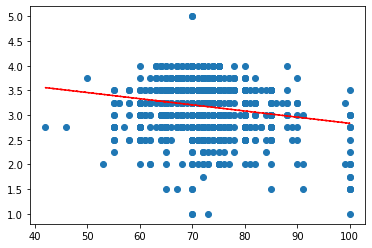

In [10]:
plt.scatter(chocolate_df.CocoaPercentage, chocolate_df.Ratings)

z = np.polyfit(chocolate_df.CocoaPercentage, chocolate_df.Ratings, 1)
line_function = np.poly1d(z)
plt.plot(chocolate_df.CocoaPercentage, line_function(chocolate_df.CocoaPercentage), "r--")

plt.show()

let's look at company location now.  td = .CompanyLocation

In [11]:
#company_data = soup.select('.Company')
#companies = []
#for company in company_data[1:]:
 # companies.append(company.get_text())
#print(companies)

company_location = soup.select(".CompanyLocation")
location = []
for country in company_location[1:]:
    location.append(country.get_text())

print(location)

['France', 'France', 'France', 'France', 'France', 'France', 'France', 'France', 'France', 'France', 'France', 'France', 'France', 'France', 'France', 'France', 'France', 'France', 'France', 'France', 'France', 'France', 'France', 'U.S.A.', 'U.S.A.', 'Fiji', 'Fiji', 'Fiji', 'Fiji', 'Ecuador', 'Ecuador', 'Mexico', 'Switzerland', 'Switzerland', 'Switzerland', 'France', 'France', 'France', 'France', 'France', 'Netherlands', 'Netherlands', 'Netherlands', 'Netherlands', 'U.S.A.', 'U.S.A.', 'U.S.A.', 'U.S.A.', 'U.S.A.', 'U.S.A.', 'U.S.A.', 'U.S.A.', 'U.S.A.', 'U.S.A.', 'U.S.A.', 'U.S.A.', 'U.S.A.', 'U.S.A.', 'U.S.A.', 'U.S.A.', 'U.S.A.', 'U.S.A.', 'U.S.A.', 'Spain', 'Spain', 'Spain', 'Spain', 'Peru', 'Peru', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Italy', 'Italy', 'Italy', 'Italy', 'Italy', 'Italy', 'Italy', 'Italy', 'Italy', 'Italy', 'Italy', 'Italy', 'Italy', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'U.S.A.', 'U.S.A.', 'France', 'France', 'France', 'France', '

Add a company country column.


In [12]:
d = {"Company" : companies, "Ratings": ratings, "CocoaPercentage": cocoa_percents, "CountryLocation": location}  

chocolate_df = pd.DataFrame.from_dict(d)

print(chocolate_df.head())


    Company  Ratings  CocoaPercentage CountryLocation
0  A. Morin     3.75               63          France
1  A. Morin     2.75               70          France
2  A. Morin     3.00               70          France
3  A. Morin     3.50               70          France
4  A. Morin     3.50               70          France


In [13]:
#What country has the highest/most ratings?
pop_country = chocolate_df.groupby("CountryLocation").Ratings.mean()

top_10_countries = pop_country.nlargest(10)

print(top_10_countries)


CountryLocation
Chile          3.750000
Amsterdam      3.500000
Netherlands    3.500000
Philippines    3.500000
Iceland        3.416667
Vietnam        3.409091
Brazil         3.397059
Poland         3.375000
Australia      3.357143
Guatemala      3.350000
Name: Ratings, dtype: float64


In [14]:
#what country has the most ratings?
most_ratings = chocolate_df.groupby("CountryLocation").Ratings.count()

top_countries = most_ratings.nlargest(10)

print(top_countries)

CountryLocation
U.S.A.         764
France         156
Canada         125
U.K.            96
Italy           63
Ecuador         54
Australia       49
Belgium         40
Switzerland     38
Germany         35
Name: Ratings, dtype: int64
